In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

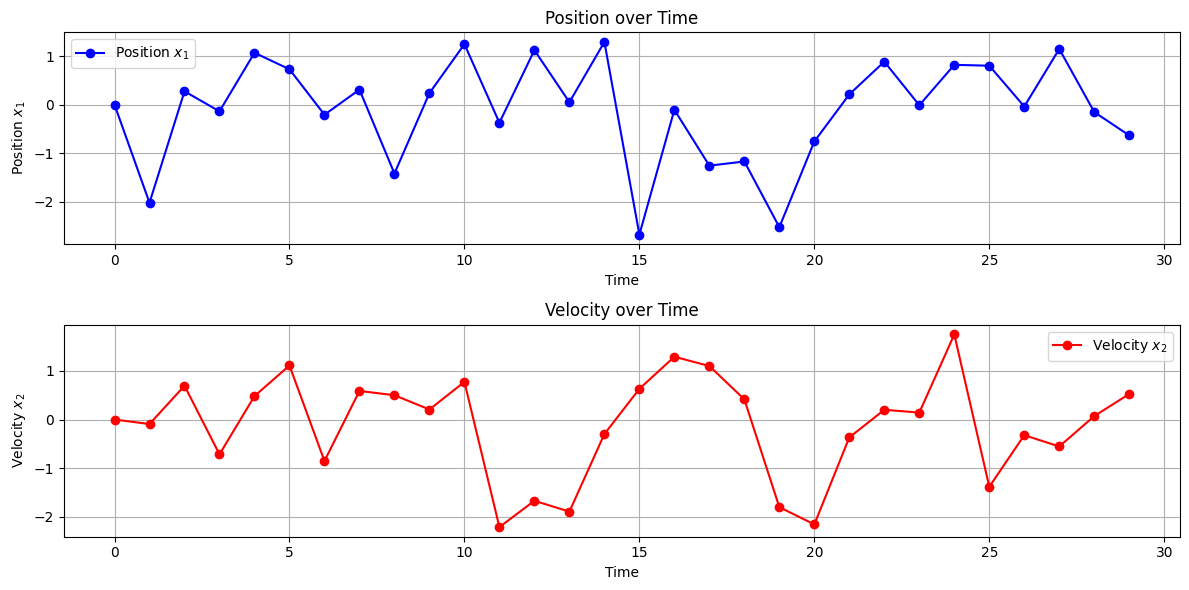

In [73]:
delta_t = 2

A = np.array([[1, delta_t], 
               [0,  1]])


B = np.array([[0],
              [1]])

C = np.array([[1, 0]])


Q = np.array([[1, 0], 
              [0, 1]]) # covariance of w (noise for state x)

R = np.array([[1]]) # covariance matrix of v 



t = 30
# dynamics
U = np.full((t,1), 20)
W = multivariate_normal.rvs(mean=(0,0), cov=Q, size=t)
V = multivariate_normal.rvs(mean=(0), cov=R, size=t)

X = np.zeros((t,2))
Y = np.zeros((t,1))

# prediction
X_hat = np.zeros((t,2))
Pt = np.zeros((2,2))


for t in range(0,t-1):
    # dynamics of the system
    X[t+1] = np.dot(A, X[t]) + np.dot(B, U[t]) + W[t]
    Y[t+1] = np.dot(C, X[t+1]) + V[t]
    
    # prediction
    Ret =  C @ Pt @ C.T + R
    # print(Ret)
    Kpt = (A @ C.T) * np.linalg.inv(Ret) 
    X_hat[t+1] = A @ X[t] + np.dot(B, U[t]) + Kpt @ (Y[t] - C @ X[t])
    
    Pt = A @ Pt @ A.T + Q - Kpt @ Ret @ Kpt.T 
    

# Plotting the results
time = np.arange(t+2)    
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, X[:, 0] - X_hat[:, 0], label='Position $x_1$', color='b', marker='o')
plt.xlabel('Time')
plt.ylabel('Position $x_1$')
plt.title('Position over Time')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, X[:, 1] - X_hat[:, 1], label='Velocity $x_2$', color='r', marker='o')
plt.xlabel('Time')
plt.ylabel('Velocity $x_2$')
plt.title('Velocity over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()








In [53]:
X 

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.01579631e+00, -8.07882085e-01],
       [ 1.73715674e+00,  4.18581802e-01],
       [ 2.67283102e+00,  1.09183292e+00],
       [ 4.43287211e+00,  2.08295142e+00],
       [ 8.57633397e+00,  3.29331081e+00],
       [ 1.61966897e+01,  6.27418072e+00],
       [ 2.82357991e+01,  8.97206555e+00],
       [ 4.48112217e+01,  1.08097061e+01],
       [ 6.70759627e+01,  1.29840080e+01],
       [ 9.48504545e+01,  1.37534027e+01],
       [ 1.22857745e+02,  1.39585439e+01],
       [ 1.51797059e+02,  1.48906788e+01],
       [ 1.81593441e+02,  1.70519919e+01],
       [ 2.15238865e+02,  1.71393143e+01],
       [ 2.51468997e+02,  1.90328754e+01],
       [ 2.90109616e+02,  2.00008928e+01],
       [ 3.30265783e+02,  2.10624206e+01],
       [ 3.71853841e+02,  2.08042726e+01],
       [ 4.13951980e+02,  2.02709758e+01],
       [ 4.55179424e+02,  2.09634749e+01],
       [ 4.97772463e+02,  2.09376195e+01],
       [ 5.39384653e+02,  2.00781075e+01],
       [ 5.

In [60]:
X_hat

array([[  0.        ,   0.        ],
       [  0.        ,   1.        ],
       [  2.56680907,   1.76871304],
       [  6.35867569,   3.18056303],
       [ 13.00692659,   4.94007712],
       [ 20.25043755,   5.03065803],
       [ 30.40833078,   6.20590809],
       [ 44.93590989,   7.61397658],
       [ 60.27732172,   8.85002502],
       [ 79.69777036,  10.4312889 ],
       [ 98.68126269,  10.49032145],
       [123.3912732 ,  12.85427041],
       [151.38608511,  14.3220021 ],
       [178.90723224,  14.45840647],
       [207.07959161,  14.45434988],
       [238.30153928,  16.20527008],
       [270.76432466,  17.6995961 ],
       [305.55363543,  18.2138641 ],
       [339.33927257,  17.9368398 ],
       [371.61318638,  17.87728958],
       [405.31018773,  17.75059199],
       [441.12788238,  18.22564994],
       [478.01568327,  19.44354094],
       [518.2393245 ,  21.65975836],
       [561.947575  ,  22.5185517 ],
       [608.97143788,  25.32422722],
       [661.46928862,  27.30042404],
 

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

array([[1, 2],
       [0, 1]])